In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [50]:
sobel_vertical_line_detector = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])


sobel_horizontal_line_detector = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

gaussian_blur = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])/16


In [55]:
def read_image():
    # Read in the image
    image = cv2.imread('pencil_pouch.jpg')

    # Change color to BGR to GRAY
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
#     plt.imshow(image, cmap='gray')
    
    return image

In [58]:
def detect_edges(image, kernel):
    pass

    return image

<Figure size 432x288 with 0 Axes>

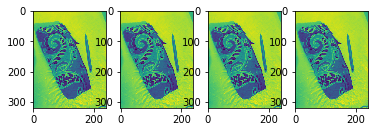

In [60]:
image = read_image()

# Do a blur first
blurred_image = detect_edges(image, gaussian_blur)

# Detect horizontal edges on image
horizontal_edges_image = detect_edges(blurred_image, sobel_horizontal_line_detector)

# Detect vertical edges on image
vertical_edges_image = detect_edges(blurred_image, sobel_vertical_line_detector)

# Display images
plt.figure()
f, axarr = plt.subplots(1, 4) 
axarr[0].imshow(image)
axarr[1].imshow(blurred_image)
axarr[2].imshow(horizontal_edges_image)
axarr[3].imshow(vertical_edges_image)
